#### Prepare Data 

In [2]:
import re

import random

import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [1]:


random.seed(0)
templates = [
    "Patient is experiencing {}.",
    "Reported signs of {}.",
    "Occasional {} experienced by patient.",
    "{}.",
    "Issues of frequent {}.",
    "{} over the last few days.",
    "Sporadic {}.",
    "Mild case of {}."
]

neg_templates = [
    "Patient reports no {}.",
    "No evidence of {} seen.",
    "{} is not present."
]


def to_symptoms_string(row: pd.Series) -> str:
    """transform an indicator row of symptoms into a shuffled string

    Args:
        row (pd.Series): indicator row of symptoms

    Returns:
        str: shuffled string representation of indicator symptoms
    """
    symptoms = row.index.values[row.values == 1].tolist()
    non_symptoms = row.index.values[row.values == 0].tolist()
    random.shuffle(symptoms)
    symptom_sentences = []
    for symptom in symptoms:
        symptom_sentences.append(
            templates[random.randint(0, len(templates) - 1)]
            .replace("{}", symptom)
        )

    total_negative = 0
    for non_symptom in non_symptoms:
        if random.random() < 0.1 and total_negative < 3:
            symptom_sentences.append(
                neg_templates[random.randint(0, len(neg_templates) - 1)]
                .replace("{}", non_symptom)
            )
            total_negative += 1

    random.shuffle(symptom_sentences)

    res = " ".join(symptom_sentences) \
        .replace(" _", " ") \
        .replace("_ ", " ") \
        .replace("_", " ")

    return res


def add_noise(data):
    if 'Unnamed: 133' in data.columns:
        data = data.drop('Unnamed: 133', axis=1)
    data['symptoms'] = data.apply(to_symptoms_string, axis=1)
    return data[['symptoms', 'prognosis']]


training = pd.read_csv("Training.csv")
testing = pd.read_csv("Testing.csv")



add_noise(training).to_csv("Training1_1.csv", index=None)
add_noise(testing).to_csv("Testing1_1.csv", index=None)



In [3]:
train_df_3 = pd.read_csv("Disease1_2.csv")
test_df_3 = pd.read_csv("Testing1_1.csv")
train_df_2 = pd.read_csv("Training1_1.csv")

In [4]:
train_df_3["prognosis"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis', 'Paroymsal Positional Vertigo',
       'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo'],
      dtype=object)

In [5]:
test_df_3["prognosis"].nunique()

41

In [6]:
train_df_2["prognosis"].nunique()

41

In [7]:
train_df_3

,symptoms,prognosis
0,Patient reports no weight gain. No evidence of...,Fungal infection
1,ulcers on tongue is not present. Sporadic noda...,Fungal infection
2,Mild case of dischromic patches. Patient is ex...,Fungal infection
3,Mild case of skin rash. Sporadic dischromic pa...,Fungal infection
4,Patient is experiencing itching. Patient repor...,Fungal infection
...,...,...
4956,Reported signs of unsteadiness. Sporadic spinn...,Paroymsal Positional Vertigo
4957,Occasional blackheads experienced by patient. ...,Acne
4958,Patient reports no lethargy. Patient reports n...,Urinary tract infection
4959,small dents in nails over the last few days. P...,Psoriasis


In [8]:
test_df_3.head()

,symptoms,prognosis
0,skin rash over the last few days. No evidence ...,Fungal infection
1,No evidence of phlegm seen. Issues of frequent...,Allergy
2,acidity over the last few days. Issues of freq...,GERD
3,lethargy is not present. Issues of frequent ye...,Chronic cholestasis
4,Mild case of skin rash. Occasional spotting ur...,Drug Reaction


In [9]:
def removeApostrophe(x):
    x = re.sub("won\`t", "will not", x)
    x = re.sub("can\`t", "can not", x)
    x = re.sub(r"couldn\`t", "could not", x)
    x = re.sub("wouldn\`t", "would not", x)
    x = re.sub("n\`t", " not", x)
    x = re.sub("\`re", " are", x)
    x = re.sub(r"\`s", " is", x)
    x = re.sub("\`d", " would", x)
    x = re.sub(r"\`ll", " will", x)
    x = re.sub(r"\`t", " not", x)
    x = re.sub(r"\`ve", " have", x)
    x = re.sub(r"\`m", " am", x)
    return x



def removeHTMLTags(x):
    soup = BeautifulSoup(x, 'lxml')
    return soup.get_text()


def removeSpecialChars(x):
    return re.sub('[^a-zA-Z]', ' ', x)

def removeurl(x):
    x = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', x, flags=re.MULTILINE)
    return(x)


def removeAlphaNumericWords(x):
    return re.sub("\S*\d\S*", "", x).strip()


train_df_3["symptoms"] = train_df_3["symptoms"].apply(removeurl)
train_df_3["symptoms"] = train_df_3["symptoms"].apply(removeHTMLTags)
train_df_3["symptoms"] = train_df_3["symptoms"].apply(removeApostrophe)
train_df_3["symptoms"] = train_df_3["symptoms"].apply(removeAlphaNumericWords)
train_df_3["symptoms"] = train_df_3["symptoms"].apply(removeSpecialChars)

train_df_2["symptoms"] = train_df_2["symptoms"].apply(removeurl)
train_df_2["symptoms"] = train_df_2["symptoms"].apply(removeHTMLTags)
train_df_2["symptoms"] = train_df_2["symptoms"].apply(removeApostrophe)
train_df_2["symptoms"] = train_df_2["symptoms"].apply(removeAlphaNumericWords)
train_df_2["symptoms"] = train_df_2["symptoms"].apply(removeSpecialChars)

test_df_3["symptoms"] = test_df_3["symptoms"].apply(removeurl)
test_df_3["symptoms"] = test_df_3["symptoms"].apply(removeHTMLTags)
test_df_3["symptoms"] = test_df_3["symptoms"].apply(removeApostrophe)
test_df_3["symptoms"] = test_df_3["symptoms"].apply(removeAlphaNumericWords)
test_df_3["symptoms"] = test_df_3["symptoms"].apply(removeSpecialChars)

In [10]:
test_df_3.head()


,symptoms,prognosis
0,skin rash over the last few days No evidence ...,Fungal infection
1,No evidence of phlegm seen Issues of frequent...,Allergy
2,acidity over the last few days Issues of freq...,GERD
3,lethargy is not present Issues of frequent ye...,Chronic cholestasis
4,Mild case of skin rash Occasional spotting ur...,Drug Reaction


In [11]:
# Lower casing & Tokenization 
test_df_3["symptoms"] = test_df_3["symptoms"].str.strip().str.lower()
train_df_3["symptoms"] = train_df_3["symptoms"].str.strip().str.lower()
train_df_2["symptoms"] = train_df_2["symptoms"].str.strip().str.lower()

In [12]:
def dostemming(x):

    #Removing Stopwords and Lemmatization
    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
      
    return x

train_df_3["symptoms"] = train_df_3["symptoms"].fillna("").apply(dostemming)
test_df_3["symptoms"] = test_df_3["symptoms"].fillna("").apply(dostemming)
train_df_2["symptoms"] = train_df_2["symptoms"].fillna("").apply(dostemming)


###### TF IDF 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_1 = tfidf.fit_transform(train_df_3["symptoms"])

In [14]:
x = text_count_1
y = train_df_3['prognosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


#### Train ML models 


In [15]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


import networkx as nx
import graphviz
from IPython.display import display
from collections import defaultdict

from sklearn import tree 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


from sklearn import metrics


from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate

import warnings
warnings.filterwarnings("ignore")

#### Naive Bayes

In [16]:
mnb1 = MultinomialNB()
mnb1 = mnb1.fit(x_train, y_train)

In [17]:
pred_mnb1 = mnb1.predict(x_test)

print("Accuracy Score of Multinomial Naive Bayes: ", accuracy_score(y_test, pred_mnb1))
print("Precision Score of Multinomial Naive Bayes: ", precision_score(y_test, pred_mnb1, average= 'macro'))
print("Recall Score of Multinomial Naive Bayes: ", recall_score(y_test, pred_mnb1, average='macro'))
print("F1-Score of Multinomial Naive Bayes: ", f1_score(y_test, pred_mnb1, average='macro'))


Accuracy Score of Multinomial Naive Bayes:  0.9899295065458208
Precision Score of Multinomial Naive Bayes:  0.9891755890913563
Recall Score of Multinomial Naive Bayes:  0.9911400558528805
F1-Score of Multinomial Naive Bayes:  0.9897664316709516


#### Decision Tree

In [18]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
dt=dt.fit(x_train,y_train)

DecisionTree


In [19]:
pred_dt1 = dt.predict(x_test)

print("Accuracy Score of Decision Tree: ", metrics.accuracy_score(y_test, pred_dt1))
print("Precision Score of Decision Tree: ", metrics.precision_score(y_test, pred_dt1, average= 'weighted'))
print("Recall Score of Decision Tree: ", metrics.recall_score(y_test, pred_dt1, average='weighted'))
print("F1-Score of Decision Tree: ", metrics.f1_score(y_test, pred_dt1, average='weighted'))

Accuracy Score of Decision Tree:  0.945619335347432
Precision Score of Decision Tree:  0.9519296254792555
Recall Score of Decision Tree:  0.945619335347432
F1-Score of Decision Tree:  0.9467392136301374


#### NN

In [20]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from sklearn.metrics import classification_report
from math import sqrt
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.layers import GlobalAveragePooling2D
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.preprocessing import LabelBinarizer



import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import load_model

from pygame import mixer
import time


pygame 2.3.0 (SDL 2.24.2, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_3 = tfidf.fit_transform(train_df_2["symptoms"])
text_count_2 = tfidf.transform(test_df_3["symptoms"])

In [22]:
x = text_count_1
y = train_df_3['prognosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit label_encoder on the training labels and transform both training and test labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



In [24]:
y_train_encoded

array([25, 16, 40, ..., 15, 14, 24])

In [25]:
y_test_encoded

array([33, 22, 18,  6,  3, 10, 18,  1,  4, 34, 24, 14,  4, 24, 33, 26, 40,
       28, 38, 24, 25, 23, 14, 37, 36, 15, 16, 26, 26, 28, 11,  8, 35, 14,
        3, 32, 35, 28, 35, 12, 14, 25,  5, 34, 30, 29, 24, 15, 20, 31, 37,
        9, 37, 15,  5, 22, 23, 39,  2,  9, 29,  8, 24,  0, 16, 38,  5, 19,
       14,  8,  5, 34, 24, 33, 28, 12, 22, 35,  4, 14, 26, 15, 30, 32,  6,
       28, 21, 28, 28,  6, 19, 15, 39,  4, 21, 37,  6, 27, 24, 16,  2, 11,
       16, 34,  3, 40, 39, 15, 28,  7, 23, 35, 28,  5, 40, 23, 24, 15,  4,
       23, 17, 13,  4, 26, 31,  5, 25,  3, 36, 22,  8,  5, 18,  7, 38, 10,
       21,  9, 17,  5, 27,  5, 38, 19, 34, 37,  6, 16, 26, 15, 25, 33, 38,
       24,  9, 31, 36, 38, 26, 15,  9,  0,  1, 29, 15,  7, 25, 22, 14, 17,
        3,  0, 18,  7, 24,  5,  8,  7, 17, 14, 10, 31, 17, 26, 34, 15, 25,
        1,  4,  5, 18, 18, 10,  9, 18, 12, 16, 15, 22, 20, 24,  7,  2, 19,
       25, 20, 34, 20, 38, 40, 22,  8,  9, 16, 10, 40,  8, 35, 15, 13, 38,
       11, 16, 15, 12, 12

In [26]:
test_y_dum = pd.get_dummies(y_test)

In [27]:
test_x_df = pd.DataFrame(x_test.toarray())
test_y_dum_df = pd.DataFrame(test_y_dum)

In [28]:

y_train_dum = pd.get_dummies(y_train)

In [29]:
x_train_df = pd.DataFrame(x_train.toarray())
y_train_dum_df = pd.DataFrame(y_train_dum)



In [30]:

#y_train_one_hot = to_categorical(y_train)

classifier = Sequential()

classifier.add(Dense(64, activation="relu", input_dim=x_train.shape[1]))
classifier.add(Dense(48, activation="relu"))
classifier.add(Dense(y_train_dum.shape[1], activation="softmax"))

classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

classifier.summary()

#nn = classifier.fit(x_train_df, y_train_dum_df, epochs=15, validation_data = test_generator, shuffle=True, 
                   # validation_steps=len(test_generator) batch_size=30)

nn = classifier.fit(x_train_df, y_train_dum_df, epochs=10, validation_data = (test_x_df,test_y_dum_df), shuffle=True)

#print('Test Score of Neural Network is : ' , classifier.score(x_test, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                19648     
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 41)                2009      
                                                                 
Total params: 24,777
Trainable params: 24,777
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
124/124 [==============================] - 1s 2ms/step - loss: 3.2849 - accuracy: 0.3964 - val_loss: 2.4104 - val_accuracy: 0.8308
Epoch 2/10
124/124 [==============================] - 0s 1ms/step - loss: 1.2186 - accuracy: 0.9105 - val_loss: 0.5677 - val_accuracy: 0.9486
Epoch 3/10
124/124 [============

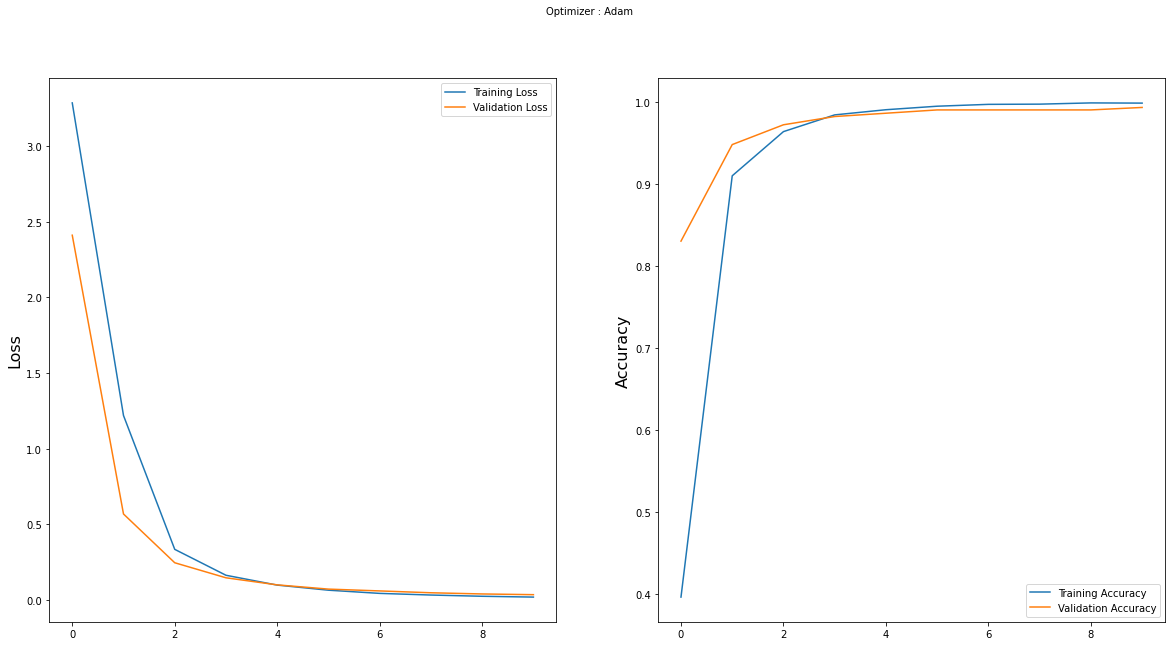

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(nn.history['loss'], label='Training Loss')
plt.plot(nn.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(nn.history['accuracy'], label='Training Accuracy')
plt.plot(nn.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()




In [35]:
pred_nn1 = classifier.predict(test_x_df)
pred_nn1_multiclass = np.argmax(pred_nn1, axis=1)


print("Accuracy Score of Neural Netowkrk: ", metrics.accuracy_score(y_test_encoded, pred_nn1_multiclass))
print("Precision Score of Neural Network: ", metrics.precision_score(y_test_encoded, pred_nn1_multiclass, average= 'weighted'))
print("Recall Score of Neural Network: ", metrics.recall_score(y_test_encoded, pred_nn1_multiclass, average='weighted'))
print("F1-Score of Neural Network: ", metrics.f1_score(y_test_encoded, pred_nn1_multiclass, average='macro'))


32/32 [==============================] - 0s 1ms/step
Accuracy Score of Neural Netowkrk:  0.9939577039274925
Precision Score of Neural Network:  0.9943356951344835
Recall Score of Neural Network:  0.9939577039274925
F1-Score of Neural Network:  0.9939493483045831


In [33]:
pred_nn1_multiclass

array([33, 22, 18,  6,  3, 10, 18,  1,  4, 34, 24, 14,  4, 24, 33, 26, 40,
       28, 38, 24, 25, 23, 14, 37, 36, 15, 16, 26, 26, 28, 11,  8, 35, 14,
        3, 32, 35, 28, 35, 12, 14, 25,  5, 34, 30, 29, 24, 15, 20, 31, 37,
        9, 37, 15,  5, 22, 23, 39,  2,  9, 29,  8, 24,  0, 16, 38,  5, 19,
       14,  8,  5, 34, 24, 33, 28, 12, 22, 35,  4, 14, 26, 15, 30, 32,  6,
       28, 21, 28, 28,  6, 19, 15, 39,  4, 21, 37,  6, 27, 24, 16,  2, 11,
       16, 34,  3, 40, 39, 15, 28,  7, 23, 35, 28,  5, 40, 23, 24, 15,  4,
       23, 17, 13,  4, 26, 31,  5, 25,  3, 36, 22,  8,  5, 18,  7, 38, 10,
       21,  9, 17,  5, 27,  5, 38, 19, 34, 37,  6, 16, 26, 15, 25, 33, 38,
       24,  9, 31, 36, 38, 26, 15,  9,  0,  1, 29, 15,  7, 25, 22, 14, 17,
        3,  0, 18,  7, 24,  5,  8,  7, 17, 14, 10, 31, 17, 26, 34, 15, 25,
        1,  4,  5, 18, 18, 10,  9, 18, 12, 16, 15, 22, 20, 24,  7,  2, 19,
       25, 20, 34, 20, 38, 20, 22,  8,  9, 16, 10, 40,  8, 35, 15, 13, 38,
       11, 16, 15, 12, 12

In [34]:
y_test_encoded

array([33, 22, 18,  6,  3, 10, 18,  1,  4, 34, 24, 14,  4, 24, 33, 26, 40,
       28, 38, 24, 25, 23, 14, 37, 36, 15, 16, 26, 26, 28, 11,  8, 35, 14,
        3, 32, 35, 28, 35, 12, 14, 25,  5, 34, 30, 29, 24, 15, 20, 31, 37,
        9, 37, 15,  5, 22, 23, 39,  2,  9, 29,  8, 24,  0, 16, 38,  5, 19,
       14,  8,  5, 34, 24, 33, 28, 12, 22, 35,  4, 14, 26, 15, 30, 32,  6,
       28, 21, 28, 28,  6, 19, 15, 39,  4, 21, 37,  6, 27, 24, 16,  2, 11,
       16, 34,  3, 40, 39, 15, 28,  7, 23, 35, 28,  5, 40, 23, 24, 15,  4,
       23, 17, 13,  4, 26, 31,  5, 25,  3, 36, 22,  8,  5, 18,  7, 38, 10,
       21,  9, 17,  5, 27,  5, 38, 19, 34, 37,  6, 16, 26, 15, 25, 33, 38,
       24,  9, 31, 36, 38, 26, 15,  9,  0,  1, 29, 15,  7, 25, 22, 14, 17,
        3,  0, 18,  7, 24,  5,  8,  7, 17, 14, 10, 31, 17, 26, 34, 15, 25,
        1,  4,  5, 18, 18, 10,  9, 18, 12, 16, 15, 22, 20, 24,  7,  2, 19,
       25, 20, 34, 20, 38, 40, 22,  8,  9, 16, 10, 40,  8, 35, 15, 13, 38,
       11, 16, 15, 12, 12

In [36]:
x = "Itching. Reported signs of dischromic patches. Patient reports no patches in throat. Issues of frequent skin rash. Patient reports no spotting urination. Patient reports no stomach pain. nodal skin eruptions over the last few days."

In [37]:
x = removeurl(x)
x = removeHTMLTags(x)
x = removeApostrophe(x)
x = removeAlphaNumericWords(x)
x = removeSpecialChars(x)

# Lower casing & Tokenization
x = x.strip().lower()

x = dostemming(x)

In [39]:
text_count_3 = tfidf.transform([x])

In [43]:
pred_output = dt.predict(text_count_3)

In [44]:
pred_output

array(['Fungal infection'], dtype=object)